In [1]:
# Cell 1: Imports and setup
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.grid"] = True

In [ ]:
df_ml_platform_search = pd.read_csv("data/ml_platform_search_counts.csv")

In [3]:
# Cell 2: Compute derived columns from df_ml_platform_search
dfp = df_ml_platform_search.copy()

# Cumulative counts up to cutoffs
dfp["<2015"] = dfp["Total"] - dfp["After 2015"]
dfp["<2020"] = dfp["Total"] - dfp["After 2020"]
dfp["<2023"] = dfp["Total"] - dfp["After 2023"]

# Disjoint period segments
dfp["2015–2019"] = dfp["After 2015"] - dfp["After 2020"]
dfp["2020–2022"] = dfp["After 2020"] - dfp["After 2023"]
dfp["2023–now"]  = dfp["After 2023"]

# Share since 2023 (computed, independent of any existing % columns)
dfp["Since 2023 (%)"] = (dfp["After 2023"] / dfp["Total"]) * 100

# Optional: inspect
dfp.head()


,Query (short),Query (exact),Total,After 2015,After 2020,After 2023,Note,After 2015 (%),After 2020 (%),After 2023 (%),<2015,<2020,<2023,2015–2019,2020–2022,2023–now,Since 2023 (%)
0,ML framework,"""machine learning framework""",7772,7405,6468,4518,NaN,95.3,83.2,58.1,367,1304,3254,937,1950,4518,58.131755
1,ML platform,"""machine learning platform""",606,599,488,250,NaN,98.8,80.5,41.3,7,118,356,111,238,250,41.254125
2,(Platform ∨ framework) ∧ manufacturing,"( ""machine learning platform"" OR ""machine lear...",290,289,272,187,NaN,99.7,93.8,64.5,1,18,103,17,85,187,64.482759
3,(Platform ∨ framework) ∧ (manufacturing ∨ prod...,"( ""machine learning platform"" OR ""machine lear...",855,852,802,559,‘production’ is broader than manufacturing,99.6,93.8,65.4,3,53,296,50,243,559,65.380117


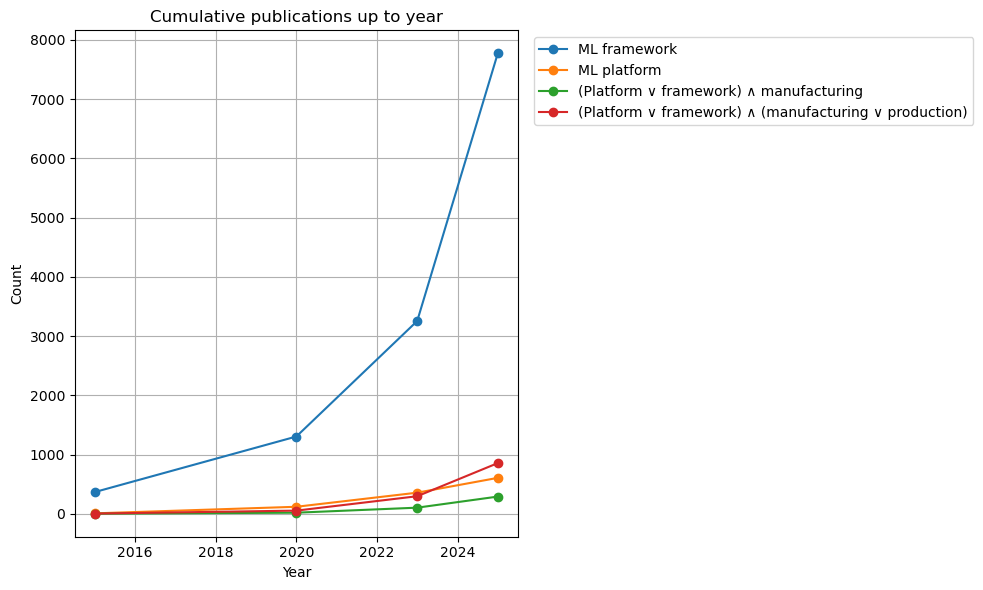

In [4]:
# Cell 3: Line plot — cumulative totals up to year
years = [2015, 2020, 2023, 2025]  # cumulative cutoffs + total(now)
for _, r in dfp.iterrows():
    y = [r["<2015"], r["<2020"], r["<2023"], r["Total"]]
    plt.plot(years, y, marker="o", label=r["Query (short)"])
plt.title("Cumulative publications up to year")
plt.xlabel("Year"); plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout(); plt.show()


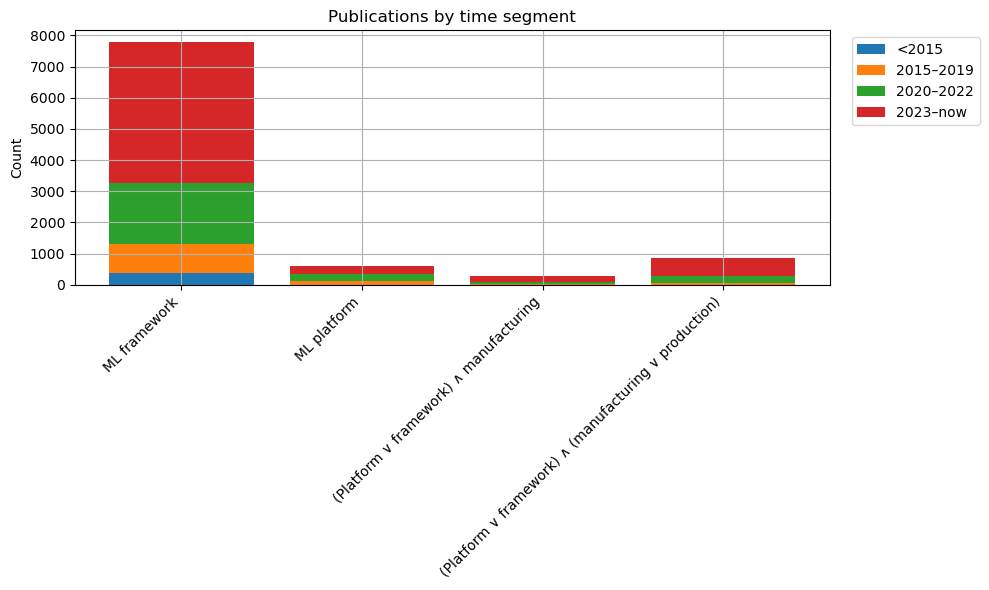

In [5]:
# Cell 4: Stacked bar — counts by time segment
segments = ["<2015", "2015–2019", "2020–2022", "2023–now"]

bottom = [0] * len(dfp)
for seg in segments:
    plt.bar(dfp["Query (short)"], dfp[seg], bottom=bottom, label=seg)
    bottom = [a + b for a, b in zip(bottom, dfp[seg])]
plt.title("Publications by time segment")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left")
plt.tight_layout(); plt.show()


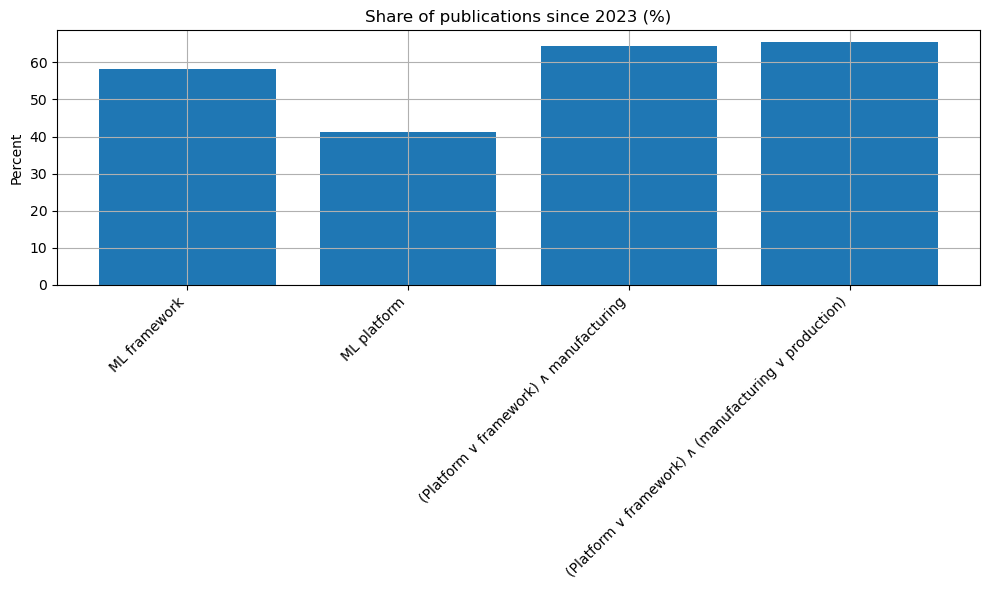

In [6]:
# Cell 5: Bar chart — share since 2023
plt.bar(dfp["Query (short)"], dfp["Since 2023 (%)"])
plt.title("Share of publications since 2023 (%)")
plt.ylabel("Percent")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()
